# Chapter 3

This Jupyter notebook contains discussions and solutions for exercises for chapter 3.

In [1]:
from chap03 import *

### Problem 1

Suppose that the probabilities that a neuron responds with a firing
rate between $r$ and $r + \Delta r$ to two stimuli labeled plus and minus are
$p[r|\pm]\Delta r$ where
$$p[r|\pm]=\frac1{\sqrt{2\pi}\sigma_r}\exp\left(-\frac12\left(\frac{r-\langle r\rangle_\pm}{\sigma_r}\right)^2\right).$$
Assume that the two mean rate parameters $\langle r\rangle_+$ and $\langle r\rangle_-$ and the
single variance $\sigma^2_r$ are chosen so that these distributions produce
negative rates rarely enough that we can integrate over $r$ values over
the entire range $−\infty < r < \infty$. Suppose that you base discrimination
of the plus and minus stimuli on whether the evoked firing rate is
greater or less than a threshold $z$. Show that the size and power, $\alpha(z)$
and $\beta(z)$ of this test are given by
$$\alpha(z)=\frac12\text{erfc}\left(\frac{z-\langle r\rangle_-}{\sqrt2\sigma_r}\right)\qquad\text{and}\qquad\beta(z)=\frac12\text{erfc}\left(\frac{z-\langle r\rangle_+}{\sqrt2\sigma_r}\right).$$
Show that the probability of a correct answer in the associated two-
alternative forced choice task involving discriminating between plus-
then-minus and minus-then-plus presentations of the two stimuli is
given by equation 3.10. Also, derive the result of equation 3.17. Plot
ROC curves for different values of the discriminability
$$d'=\frac{\langle r\rangle_+-\langle r\rangle_-}{\sigma_r}.$$
By simulation, determine the fraction of correct discriminations that
can be made in the two-alternative forced choice task. Show that the
fractions of correct answer for different values of $d'$ are equal to the
areas under the corresponding ROC curves.

***
By definition
$$\alpha(z) = P[r\ge z|-] = \int_z^\infty p[r|-]dr,$$
$$\beta(z) = P[r\ge z|+] = \int_z^\infty p[r|+]dr.$$

The [complementary error function](https://en.wikipedia.org/wiki/Error_function) $\text{erfc }x$ is defined as
$$\text{erfc }x = 1 - \text{erf } x,$$
where $\text{erf }x$ is the standard error function
$$\text{erf }x = \frac{2}{\sqrt{\pi}}\int_0^x \exp(t^2)dt = \frac1{\sqrt\pi}\int_{-x}^x \exp(t^2)dt$$

By the symmetry of tha gauss integral it is easy to show now that
$$\alpha(z) = \int_z^\infty \frac1{\sqrt{2\pi}\sigma_r}\exp\left(-\frac12\left(\frac{r-\langle r\rangle_-}{\sigma_r}\right)^2\right)dr = \frac1{\sqrt\pi}\int_{\frac{z-\langle r\rangle_-}{\sqrt2\sigma_r}}^\infty \exp(-t^2)dt = \frac12\text{erfc }\left(\frac{z-\langle r\rangle_-}{\sqrt2\sigma_r}\right)$$
and similarly for $\beta(z)$.

Now we move to computation of $P[\text {correct}]$.
$$P[\text {correct}] = \int_0^\infty p[z|-]\beta(z) = \int_0^\infty dz\, p[z|-]\int_z^\infty dr\, p[r|+]= \int_{-\infty}^\infty dz\,\int_z^\infty dr\, p[z|-]p[r|+]$$

Where we used in the last equality the assumption we can integrate over the entire range $−\infty < r < \infty$. Substituting Gaussian distributions we have
$$P[\text {correct}] = \frac1{2\pi\sigma_r^2}\int_{-\infty}^\infty dz\,\int_z^\infty dr\, \exp\left(-\frac12\left(\frac{z-\langle r\rangle_-}{\sigma_r}\right)^2\right)\exp\left(-\frac12\left(\frac{r-\langle r\rangle_+}{\sigma_r}\right)^2\right)$$

Since gaussian distribution is integrable we can change the order of integrals by Fubini's theorem. This gives us possibility to change the region of integration to more practical one. Current one is $M=\{(r,z)| z\in\mathbb{R}, r>z\}$, by the rotation of the axis we can map this region to $\tilde M = \{(s,t)| s\in\mathbb R, t>0\}$. We use mapping
$$s=\frac12(r+z),\qquad t  = \frac12(r-z),$$
thus
$$r=s+t,\qquad z=s-t$$
and Jacobian of the transformation is $J=2$. Therefore we obtain

$$P[\text {correct}] = \frac1{\pi\sigma_r^2}\int_{-\infty}^\infty ds\,\int_0^\infty dt\, \exp\left(-\frac12\left(\frac{s-t-\langle r\rangle_-}{\sigma_r}\right)^2\right)\exp\left(-\frac12\left(\frac{s+t-\langle r\rangle_+}{\sigma_r}\right)^2\right)$$
Now a little bit of algebra yields
$$(s-t-\langle r\rangle_-)^2+(s+t-\langle r\rangle_+)^2=2\left(s-\frac12(\langle r\rangle_++\langle r\rangle_-)\right)^2+2\left(t-\frac12(\langle r\rangle_+-\langle r\rangle_-)\right)^2$$
This separates the computation into two independent integrals
$$P[\text {correct}] = \frac1{\pi\sigma_r^2}\int_{-\infty}^\infty ds\, \exp\left(-\left(\frac{s-\frac12(\langle r\rangle_++\langle r\rangle_-)}{\sigma_r}\right)^2\right)\int_0^\infty dt\,\exp\left(-\left(\frac{t-\frac12(\langle r\rangle_+-\langle r\rangle_-)}{\sigma_r}\right)^2\right)$$
First integral is of Gauss type, the second will lead to the complementary error function. Evaluating first integral we are left with
$$P[\text {correct}] = \frac1{\sqrt\pi\sigma_r}\int_0^\infty dt\,\exp\left(-\left(\frac{t-\frac12(\langle r\rangle_+-\langle r\rangle_-)}{\sigma_r}\right)^2\right)=\frac1{\sqrt\pi}\int_{\frac{\langle r\rangle_--\langle r\rangle_+}{2\sigma_r}}^\infty dt\,\exp(t^2) = \frac12\text{erfc }\left(-\frac{d'}{2}\right)$$

Now we derive eq. 3.17
$$P[+|r]=\frac1{1+\exp(-d'(r-r_{avg})/\sigma_r)}$$

Using Bayes theorem we have
$$P[+|r] = \frac{p[r|+]P[+]}{p[r]}=\frac{p[r|+]P[+]}{p[r|+]P[+]+p[r|-]P[-]}=\frac{p[r|+]}{p[r|+]+p[r|-]}$$
where in the last we used $P[+]=P[-]$
$$\frac{p[r|-]}{p[r|+]}= \exp\left(\frac1{2\sigma^2_r}[(r-\langle r\rangle_-)^2-(r-\langle r\rangle_+)^2]\right)=\exp\left(-d'(r-r_{avg})/\sigma_r\right)$$
Thus we see the equation 3.17 holds.

|  d  |  P[correct] simulation  |  P[correct] integration  |
|-----|-------------------------|--------------------------|
| 0.0 |                  50.00  |                   50.00  |
| 0.8 |                  71.19  |                   70.21  |
| 1.5 |                  85.03  |                   85.56  |
| 2.2 |                  94.68  |                   94.42  |
| 3.0 |                  98.29  |                   98.31  |


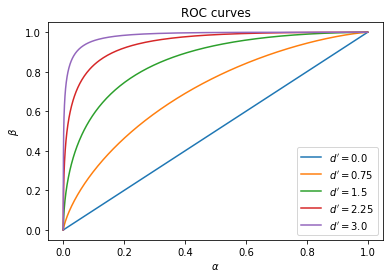

In [2]:
exercise1()

### Problem 2

Simulate the random-dot discrimination experiment. Denote the
stimulus by plus or minus, corresponding to the two directions of
motion. On each trial, choose the stimulus randomly with equal
probability for the two cases. When the minus stimulus is chosen,
generate the responses of the neuron as $20$ Hz plus a random Gaussian term with a standard deviation of 10 Hz (set any rates that come
out negative to zero). When the plus stimulus is chosen, generate
the responses as $20 + 10d$ Hz plus a random Gaussian term with a
standard deviation of $10$ Hz, where d is the discriminability (again,
set any rates that come out negative to zero). First, choose a threshold
$z = 20 + 5d$, which is half-way between the means of the two response
distributions. Whenever $r \ge z$ guess “plus”, otherwise guess “mi-
nus”. Over a large number of trials ($1000$, for example) determine
how often you get the right answer for different $d$ values. Plot the
percent correct as a function of d over the range $0 \le d \le 10$. Next, by
allowing z to vary over a range, plot ROC curves for several values
of $d$ (starting with $d = 2$). To do this, determine how frequently the
guess is “plus” when the stimulus is, in fact, plus (this is $\beta$), and how
often the guess is “plus” when the real stimulus is minus (this is $\alpha$).
Then, plot $\beta$ versus $\alpha$ for z over the range $0 \le z \le 140$.


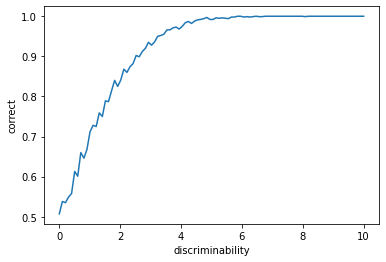

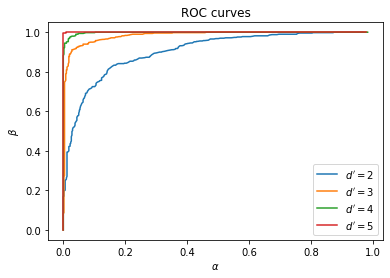

In [2]:
exercise2()

### Problem 3

Simulate the responses of four interneurons in the cercal system of
the cricket and check the accuracy of a vector decoding scheme. For a
true wind direction $\theta$, the average firing rates of the four interneurons
should be generated as
$$\langle r_i\rangle = [50 \text{Hz} \cos(\theta − \theta_i\ )]_+ ,$$
where $[~]_+$ indicates half-wave rectification, and $\theta_i = \pi/4, 3\pi/4, 5\pi/4, 7\pi/4$ for $i = 1, 2, 3, 4$. The actual rates, $r_i$ , are then obtained by adding
to these mean rates a random number chosen from a Gaussian dis-
tribution with zero mean and a standard deviation of $5$ Hz (set any
rates the come out negative to zero). From these rates, construct the
$x$ and $y$ components of the population vector
$$x =\sum_{i=1}^4r_i\cos\theta_i\qquad\text{and}\qquad y=\sum_{i=1}^4r_i\sin\theta_i$$
and, from the direction of this vector, compute an estimate $\theta_{\text{est}}$ of the
wind direction. Average the squared difference $(\theta − \theta_{\text{est}})^2$ over 1000
trials. The square root of of this quantity is the error. Plot the error
as a function of $\theta$ over the range $−90^\circ\le \theta \le 90^\circ$.
***

In this problem the biggest issue is to computing the estimated $\theta_{\text{est}}$. Although we have $\theta$ in range $(-\pi/2;\pi/2)$ the noise causes
jumping out of the range for $\arctan x$. Also the error for big $x$ is high, so we base the estimation on the values of $x$ and $y$ and use $\arctan y/x$ or $\text{acrcot}\, y/x = \arctan -x/y$ with appropriate shift of the result. As expected drops in errors for angles around prefered direction are observed.

To implement the whole rangle of angles we would have to deal with the jump of values 



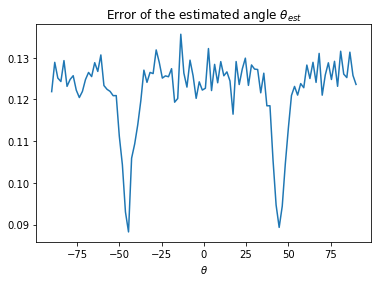

In [2]:
exercise3()

### Problem 5
Show that the Bayesian estimator that minimizes the expected average value of the the loss function $L(s, s_{\text{bayes}}) = (s − s_\text{bayes} )^2$ is the mean
of the distribution $p[s|\mathbf{r}]$, given by equation 3.27. Also show that
the estimate that arises from minimizing the expected loss function
$L(s, s_\text{bayes} ) = |s − s_\text{bayes} |$ is the median of $p[s|\mathbf r]$.

***
The estimate $s_\text{bayes}$ is given as minimum of the loss function. Therefore we are solving 
$$\frac{\partial}{\partial s_\text{bayes}}\int \text ds\,L(s, s_{\text{bayes}})p[s|\mathbf{r}] = 0$$

In the first case we have equation
$$0=\int\text ds\,(s-s_{\text{bayes}})p[s|\mathbf{r}]=\int\text ds\,s\,p[s|\mathbf{r}] - s_{\text{bayes}}\int\text ds\,p[s|\mathbf{r}]=\int\text ds\,s\,p[s|\mathbf{r}] - s_{\text{bayes}}$$
Thus we proved
$$s_{\text{bayes}} =\int\text ds\,s\,p[s|\mathbf{r}]$$

For the second case we have
$$0=\frac{\partial}{\partial s_\text{bayes}}\left(\int_{s_{\text{bayes}}}^\infty \text ds\,(s - s_{\text{bayes}})p[s|\mathbf{r}]+\int_{-\infty}^{s_{\text{bayes}}} \text ds\,(s_{\text{bayes}}-s)p[s|\mathbf{r}]\right)$$
Since terms raising from the derivatives of the integral bounds are zero we are left with
$$\int_{s_{\text{bayes}}}^\infty \text ds\,p[s|\mathbf{r}]=\int_{-\infty}^{s_{\text{bayes}}} \text ds\,p[s|\mathbf{r}]$$
which is just a definition of median for a distribution, because
$$\int_{s_{\text{bayes}}}^\infty \text ds\,p[s|\mathbf{r}]=1 - \int_{-\infty}^{s_{\text{bayes}}} \text ds\,p[s|\mathbf{r}]$$
thus $s_{\text{bayes}}$ is given by
$$\int_{-\infty}^{s_{\text{bayes}}} \text ds\,p[s|\mathbf{r}]=\frac12$$
therefore median of conditional distribution.

### Problem 6

test $\langle$

Show that the equations for the Fisher information in equation 3.42
can also be written as in equation 3.43,

$$I_F(s) =\left\langle\left(\frac{\partial\ln p[\mathbf{r}| s]}{\partial s}\right) ^2\right\rangle=\int\text d \mathbf{r}\,p[\mathbf{r}|s]\left(\frac{\partial\ln p[\mathbf{r}| s]}{\partial s}\right)^2$$
or as
$$I_F(s) =\int\text d\mathbf{r}\,\frac1{p[\mathbf{r}|s]}\left(\frac{\partial p[\mathbf{r}| s]}{\partial s}\right)^2$$
Use the fact that 
$\int\text d\mathbf{r}\, p[\mathbf{r}|s] = 1$.

***
Fisher information in equation 3.42 is defined as
$$I_F(s) =\left\langle-\frac{\partial^2\ln p[\mathbf{r}| s]}{\partial s^2}\right\rangle$$
$$=\int\text d \mathbf{r}\,p[\mathbf{r}|s]\left(-\frac{\partial^2\ln p[\mathbf{r}| s]}{\partial s^2}\right)$$
$$=-\int\text d\mathbf{r} p[\mathbf{r}|s]\frac{\partial}{\partial s}\left(\frac1{p[\mathbf{r}|s]}\frac{\partial p[\mathbf{r}|s]}{\partial s}\right)$$
$$=-\int\text d\mathbf{r} p[\mathbf{r}|s]\frac{\partial}{\partial s}\frac1{p[\mathbf{r}|s]}\frac{\partial p[\mathbf{r}|s]}{\partial s}-\int\text d\mathbf{r} p[\mathbf{r}|s]\frac1{p[\mathbf{r}|s]}\frac{\partial^2 p[\mathbf{r}|s]}{\partial s^2}$$
$$= \int\text d\mathbf{r} \frac1{p[\mathbf{r}|s]}\left(\frac{\partial p[\mathbf{r}|s]}{\partial s}\right)^2-\frac{\partial^2}{\partial s^2}\int\text d\mathbf{r} p[\mathbf{r}|s]$$
$$= \int\text d\mathbf{r} \frac1{p[\mathbf{r}|s]}\left(\frac{\partial p[\mathbf{r}|s]}{\partial s}\right)^2$$
in the last equality we used the fact, that the given integral is 1 and its derivative is zero.